In [1]:
!pip install seaborn

In [2]:
#importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#matplotlib inline

In [3]:
#importing the dataset and Extracting the Independent and Dependent variables
companies = pd.read_csv(r'C:\Users\hp\Desktop\linear.csv')
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values
companies


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [4]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

DATA VISUALIZATION
BUILDING THE CORRELATION MATRIX



<AxesSubplot:>

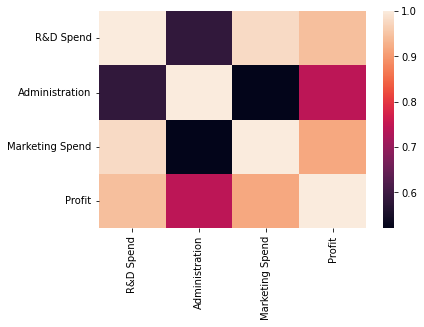

In [5]:
sns.heatmap(companies.corr())

In [6]:
### Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:,3])

transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [3]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = transformer.fit_transform(X.tolist())
X = X.astype('float64')
print(X[3])

[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
 3.8319962e+05]


In [7]:
X = X[:, 1:]

In [8]:
#Splitting the dataset into the training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
X_train

array([[0.00000000e+00, 0.00000000e+00, 3.83850000e+04, 1.16125967e+05,
        1.42843002e+05],
       [1.00000000e+00, 0.00000000e+00, 1.25610000e+05, 1.29007753e+05,
        3.11143877e+05],
       [0.00000000e+00, 0.00000000e+00, 1.01322000e+05, 1.25420790e+05,
        2.64280115e+05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 2.28760000e+04, 1.13835527e+05,
        1.12918344e+05],
       [0.00000000e+00, 0.00000000e+00, 6.67660000e+04, 1.20317403e+05,
        1.97604218e+05],
       [0.00000000e+00, 0.00000000e+00, 1.12108000e+05, 1.27013716e+05,
        2.85091731e+05]])

In [10]:
#Fitting Multiple Linear Regresision to the Training set'
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532915,  88427.0718736 ,  94894.67836971, 175680.86725612,
        83411.73042088, 110571.90200074, 132145.2293644 ,  91473.37719686,
       164597.05380607,  53222.82667399,  66950.19050988, 150566.43987005,
       126915.20858596,  59337.85971049, 177513.91053063,  75316.2814305 ,
       118248.14406603, 164574.40699903, 170937.2898107 , 182069.11645086,
       118845.03252688,  85669.95112228, 180992.59396145,  84145.08220144,
       105005.83769214, 101233.56772746,  53831.07669089,  56881.41475223,
        68896.39346904, 210040.00765885, 120778.72270894, 111724.87157654,
       101487.90541517, 137959.02649624,  63969.95996742, 108857.91214126,
       186014.72531989, 171442.64130748, 174644.26529206, 117671.49128195,
        96731.37857433, 165452.2577941 , 107724.34331255,  50194.54176912,
       116513.89532179,  58632.48986819, 158416.46827611,  78541.48521609,
       159727.66671744, 131137.87699644, 184880.70924518, 174609.08266881,
        93745.66352058,  

In [12]:
#Calculating the coefficients
print(regressor.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [13]:
#calculating the Intercept
print(regressor.intercept_)

-51035.22972404407


In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.911269589226883